In [9]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


In [10]:
dados_substancias = pd.DataFrame({
    'Substância': ['Álcool', 'Gasolina', 'Leite', 'Querosene', 'Óleo', 'Vinho'],
    'Concentração (%)': [12.5, 0.1, 4.0, 1.2, 0.5, 15.0],
    'Teor Alcoólico (%)': [50, 0.05, 0.01, 0.02, 0.01, 12.5]
})


In [16]:
dados_substancias = dados_substancias.drop('Substância', axis=1)

In [17]:
kmeans = KMeans(n_clusters=2)  
kmeans.fit(dados_substancias)

c:\Users\dsadm\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=2)

In [18]:
sse = kmeans.inertia_
print("SSE:", sse)

SSE: 280.72348


In [19]:
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

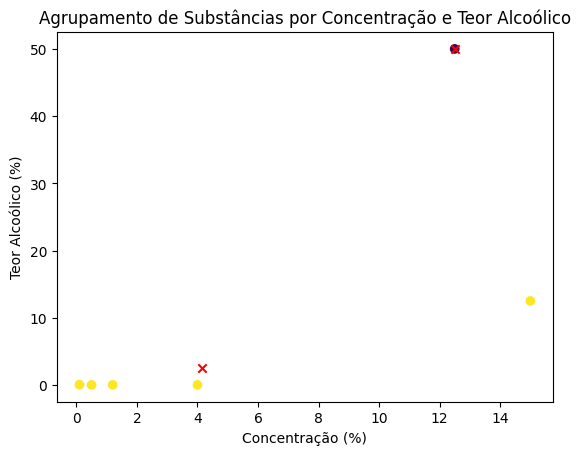

In [20]:
plt.scatter(dados_substancias['Concentração (%)'], dados_substancias['Teor Alcoólico (%)'], c=labels)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', color='red')
plt.xlabel('Concentração (%)')
plt.ylabel('Teor Alcoólico (%)')
plt.title('Agrupamento de Substâncias por Concentração e Teor Alcoólico')
plt.show()

In [21]:
dados_substancias['Grupo'] = labels
grouped_data = dados_substancias.groupby('Grupo').mean()
print(grouped_data)

       Concentração (%)  Teor Alcoólico (%)  Cluster
Grupo                                               
0                 12.50              50.000      0.0
1                  4.16               2.518      1.0
